In [3]:
import numpy as np
import matplotlib.pyplot as plt

import SCA
from SCA import Space_colonization
from point_cloud import PointCloud

import sys
sys.path.insert(1, '/Users/anyak/Documents/Lab/SWC/astroTanya')
sys.path.insert(1, '/Users/anyak/Documents/Lab/neuro.im-proc')
import astrobject
from astrobject import ascii, Table
import networkx as nx

from scipy.spatial import ConvexHull

/Users/anyak/opt/anaconda3/envs/SemLab/lib/python3.10/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


Can't load imreg package, affine and homography registrations won't work


/Users/anyak/image-funcut/imfun/external/tifffile.py:7261: UserWarning: No module named 'imfun.external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/anyak/image-funcut/imfun/external/czifile.py:146: UserWarning: ImportError: No module named '_czifile'. Decoding of JXR and JPEG encoded images will not be available. Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  warnings.warn(


# Initial parameters

In [4]:
class Units:
    def __init__(self, number, unit):
        Params = {}
        Params['milli'] = 1
        Params['micro'] = Params['milli'] * 10**(3)
        Params['centi'] = Params['milli'] * 10**(-1)
        Params['nano'] = Params['micro'] * 10**(3)
        Params['pico'] = Params['nano'] * 10**(3)
        self.params = Params
        self.number = number
        if unit in Params.keys():
            self.unit = unit
        else:
            raise KeyError(print('Unit do not recognized. Please add it according to the existing units'))
        
    def add_param(self, new_param, default_param, relation_to_default_param):
        if new_param in self.params.keys():
            raise KeyError(print('Parametes already exist'))
        if default_param in self.params.keys():
            self.params[new_param] = default_param * relation_to_default_param
            
    def convert(self, to_b):
        if to_b in self.params.keys():
            ratio = self.params[to_b]/self.params[self.unit]
            return self.number * ratio

In [5]:
u = Units(10, 'centi')
u.convert('milli')

100.0

In [6]:
def apply_distribution_3D(input_data, distribution):
    pass

class Input_Parameters:

    def __init__(area_radius, total_steps, Di=2, Dk=0.02, Dg=0.01):
        self.area_radius = area_radius
        self.synapse_density_per_mm3 = 2.1307
        self.somata_density_per_mm3 = 0.292

        somata_volume = 349.3 
        domain_voloume = []
        self.somata_radii = []
    
        number_of_synapses = self.area_radius_mm3 / self.synapse_density_per_mm3
        steps_to_border = area_radius/Dg
        phase_1 = np.round(0.33*total_steps)
        
        
# from domain area extract radial distance between somatas
# astro_junctions = []
#terminal points within Dj 

In [7]:
# counting average growth steps from domain radial distance divided by Bl
growth_steps = []


# Fix .swc coordinates

In [8]:
center = [60, 60, 60]
cloud = PointCloud(R=30, center=center, Npoints=1000)
sources = cloud.Cube()

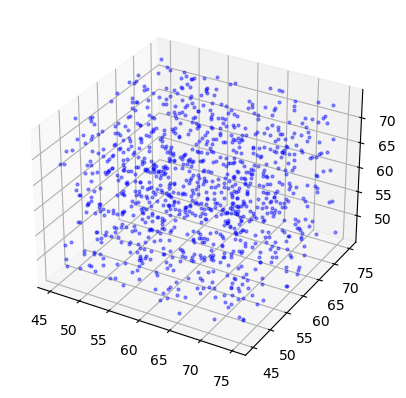

In [9]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(projection='3d')
# ax.plot(roots[:,  0], roots[:, 1], roots[:, 2], 'o', color='r', alpha=0.6, ms=4)
ax.plot(sources[:,  0], sources[:, 1], sources[:, 2], 'o', color='blue', alpha=0.4, ms=2)

In [10]:
# root = center
roots = [[60, 60, 60], [50, 60, 70], [70, 55, 55]]
test_space = Space_colonization(root=roots, sources=sources)
test_space.set_parameters(Dg=0.01*30, 
                          Dk=2, 
                          Di=4,
                          iters=500
)
test_space.go_tree_classic()

  0%|          | 0/500 [00:00<?, ?it/s]

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(cells)
/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:181: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = color, alpha=0.7)


(43.63202707277652, 76.26861816155221, 43.59116061377572, 76.22775170255142)

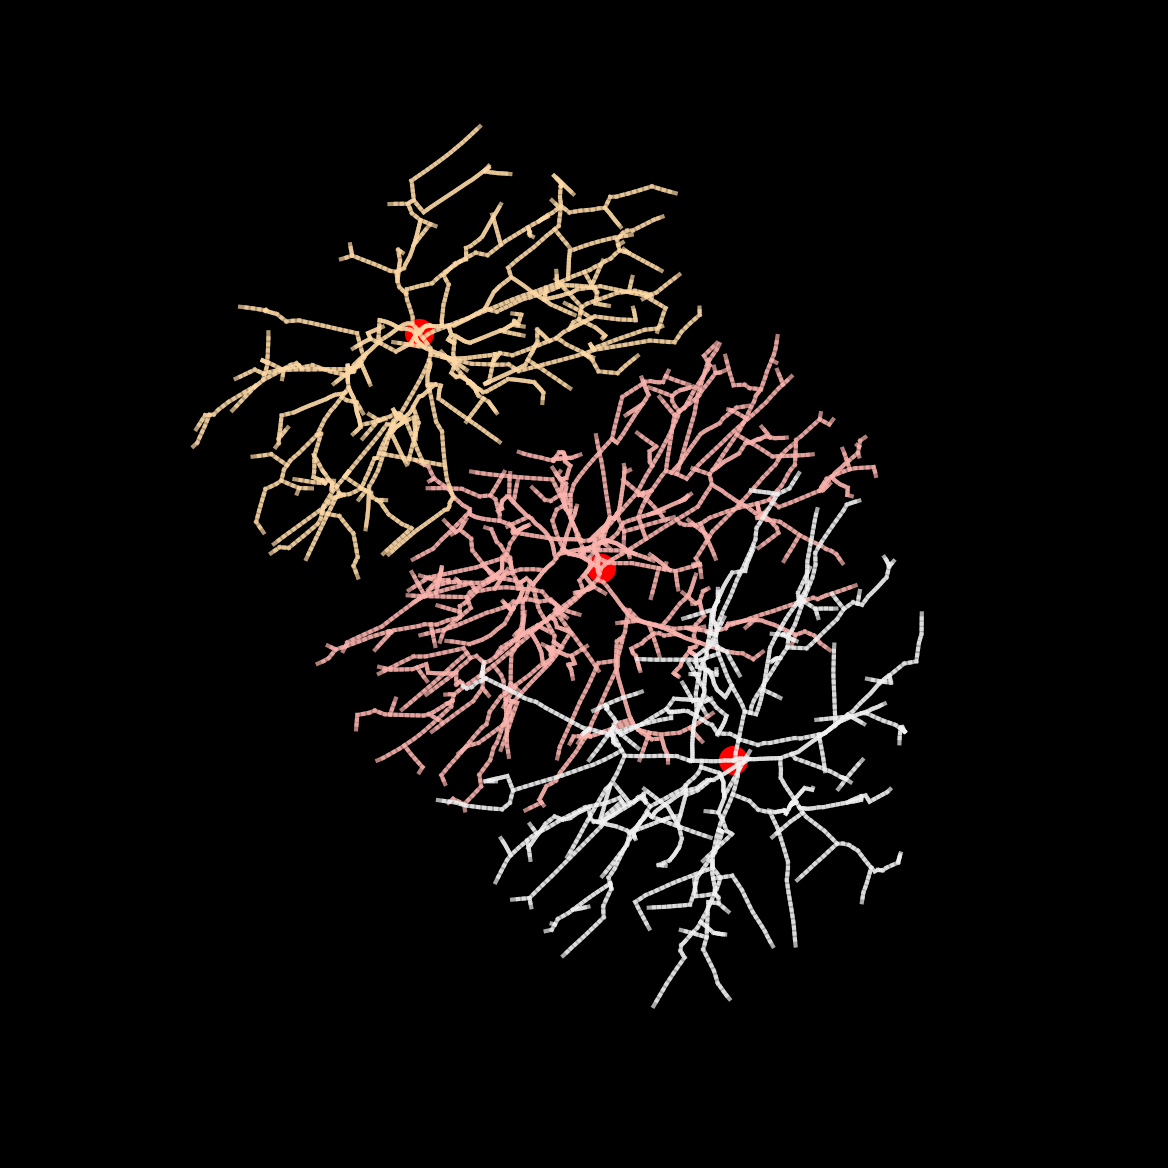

In [11]:
t, r, s = test_space.tree, test_space.root, test_space.sources
fig = plt.figure(dpi=300, facecolor='black')
ax = fig.add_subplot(projection='3d')
SCA.plot_tree(tree=t, roots=test_space.root, ax=ax, show_leaflets=False, show_sources=True, colored_cells=True, cmap='Pastel1')
ax.set_facecolor('black')
ax.axis('off')

In [10]:
tips = [i for i in t if len(i.children) == 0]
pts = np.array([j.v for j in tips])

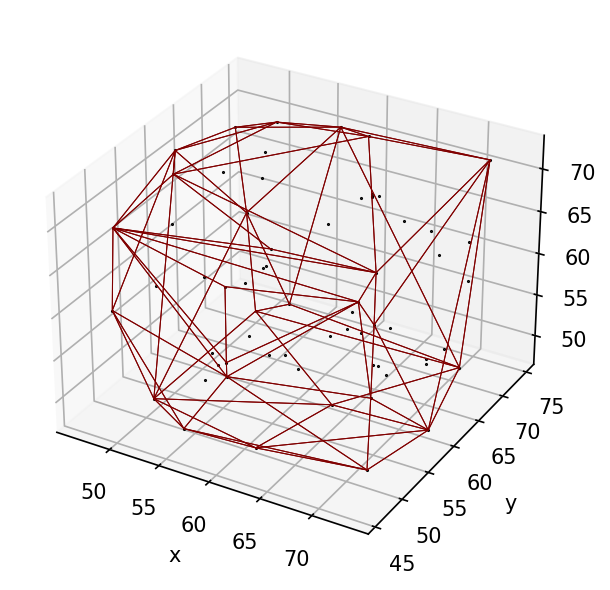

In [42]:
hull = ConvexHull(pts)

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko", ms=0.5)

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], c="maroon", lw=0.5)

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

/Users/anyak/Documents/Lab/AstroSpace/AstroSpace-main/AstroSpace/SCA.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plot(vx[:,0], vx[:,1], vx[:, 2], 'k-', lw=1, color = tree_color, alpha=0.7)


(40.0, 80.0)

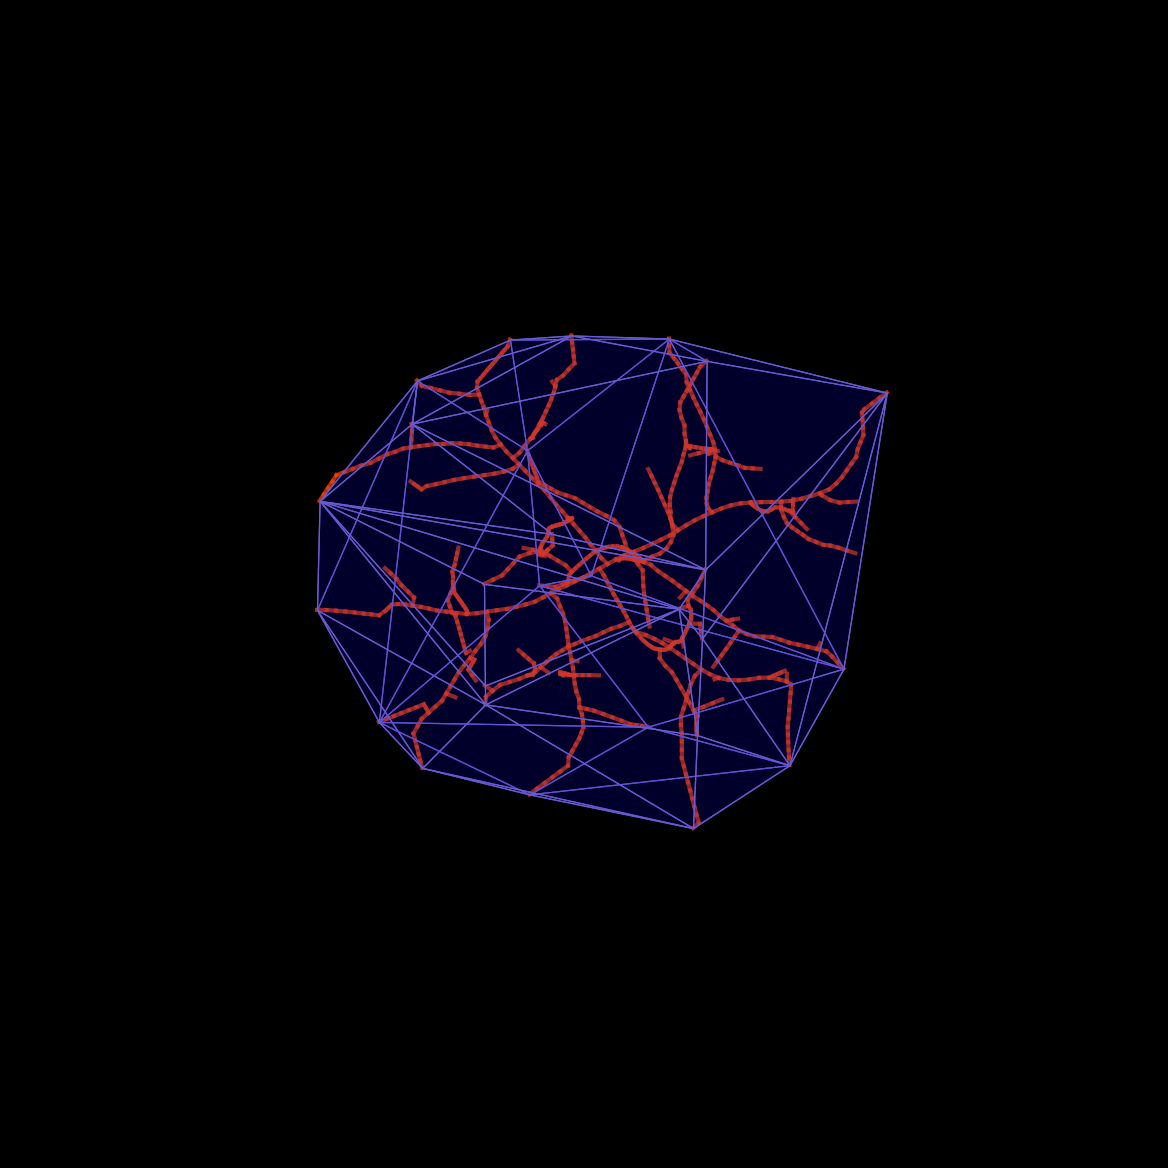

In [130]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors

fig = plt.figure(dpi=300, facecolor='black')
ax = fig.add_subplot(111, projection="3d")
ax.set_alpha(0.1)
ax.set_facecolor('black')
ax.grid(False)
ax.axis('off')
# ax.view_init(elev=50)

for s in hull.simplices:
    tri = Poly3DCollection([pts[s]])
    tri.set_edgecolor('slateblue')
    tri.set_facecolor('blue')
    tri.set_alpha(0.09)
    tri.set_linewidth(0.3)
    ax.add_collection3d(tri)
# draw the vertices
# ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], marker='.', color='r')

SCA.plot_tree(tree=t, show_leaflets=False, ax=ax, tree_color='orangered')
ax.set_xlim3d(40, 80)
ax.set_ylim3d(40, 80)
ax.set_zlim3d(40, 80)

In [45]:
def tree_to_graph(tree, optimize_graph=False):
    def get_node(node):
        '''
        represent node as tuple
        '''
        v = node.v
        return tuple(v)
    root = [i for i in tree if i.parent == None][0]

    graph = nx.DiGraph()
    segms = [(get_node(node.parent), get_node(node)) for node in tree if node != r]
    children = root.children
    root_connect = [(get_node(root), get_node(child)) for child in children]
    graph.add_node(get_node(root), root = get_node(root))
    graph.add_nodes_from([get_node(node) for node in tree if node != root], root = get_node(root))
    graph.add_edges_from(segms, root = get_node(root))
    graph.add_edges_from(root_connect, root = get_node(root))

    return graph

In [46]:
filename = 'test_translate_coords_v2.swc'
graph = tree_to_graph(tree=t)

In [47]:
ratio=(1, 1, 1)
cell_type = 7
center = tuple([i.v for i in t if i.parent == None][0])
obj = astrobject.AG(graph).swc(center=tuple(center))

SCA.swc_save(data=obj, filename=filename, cell_type=7, ratio=(1, 1, 1))

  0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
import tmd 
from tmd.view import view, plot
import morphio 
import neurom as nm
from neurom.view import matplotlib_impl, matplotlib_utils

In [27]:
cell = tmd.io.load_neuron(filename, remove_duplicates=True)

In [28]:
ph_astro = tmd.methods.get_ph_neuron(cell)

(array([[1.24673132e-03, 1.57094478e-03, 1.96365104e-03, ...,
         7.10696316e-09, 4.49787657e-09, 2.83023689e-09],
        [1.14896139e-03, 1.45280955e-03, 1.82237646e-03, ...,
         1.12056879e-08, 7.14751981e-09, 4.53236611e-09],
        [1.04699577e-03, 1.32855490e-03, 1.67244523e-03, ...,
         1.76453525e-08, 1.13396825e-08, 7.24395502e-09],
        ...,
        [1.21937536e-01, 1.24870359e-01, 1.26998188e-01, ...,
         5.69830208e-01, 5.68401148e-01, 5.62623637e-01],
        [1.16518999e-01, 1.19536846e-01, 1.21787780e-01, ...,
         5.17845316e-01, 5.18367504e-01, 5.14907041e-01],
        [1.10228747e-01, 1.13290164e-01, 1.15629201e-01, ...,
         4.66124230e-01, 4.68228491e-01, 4.66732025e-01]]),
 (<Figure size 640x480 with 1 Axes>,
  <AxesSubplot: title={'center': 'Persistence image'}, xlabel='End radial distance from soma', ylabel='Start radial distance from soma'>))

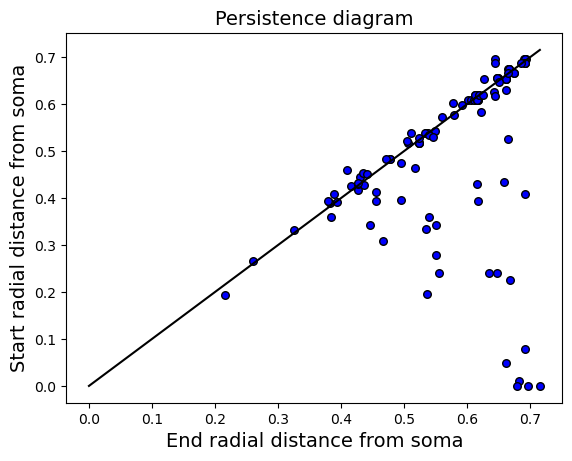

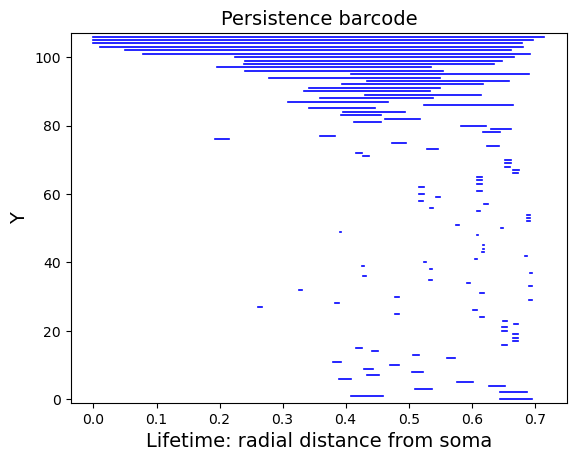

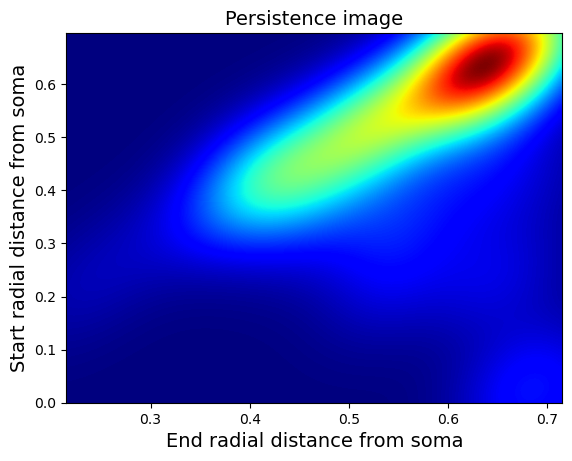

In [29]:
plot.diagram(ph_astro, subplot=True)
# plt.savefig('diagram.png', dpi=300)

plot.barcode(ph_astro, subplot=True)
# plt.savefig('barcode.png', dpi=300)

plot.persistence_image(ph_astro, subplot=True)
# plt.savefig('persistence_image.png', dpi=300)

# Thickness

In [164]:
np.random.choice(range(322-113, 322+114, 1))

357

In [24]:
from matplotlib import cm
cmap = cm.get_cmap('Pastel1', 8)
cmap.colors

array([[0.98431373, 0.70588235, 0.68235294, 1.        ],
       [0.70196078, 0.80392157, 0.89019608, 1.        ],
       [0.8       , 0.92156863, 0.77254902, 1.        ],
       [0.87058824, 0.79607843, 0.89411765, 1.        ],
       [1.        , 1.        , 0.8       , 1.        ],
       [0.89803922, 0.84705882, 0.74117647, 1.        ],
       [0.99215686, 0.85490196, 0.9254902 , 1.        ],
       [0.94901961, 0.94901961, 0.94901961, 1.        ]])